In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Shape
print(X.shape)
print(y.shape)

# Color definitions
colors = {
  0: '#b40426',
  1: '#3b4cc0',
  2: '#f2da0a',
}

# Legend definition
legend = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

# Perform standardization
for dim in range(0, X.shape[1]):
  print(f'Old mean/std for dim={dim}: {np.average(X[:, dim])}/{np.std(X[:, dim])}')
  X[:, dim] = (X[:, dim] - np.average(X[:, dim])) / np.std(X[:, dim])
  print(f'New mean/std for dim={dim}: {np.abs(np.round(np.average(X[:, dim])))}/{np.std(X[:, dim])}')

(150, 4)
(150,)
Old mean/std for dim=0: 5.843333333333334/0.8253012917851409
New mean/std for dim=0: 0.0/1.0
Old mean/std for dim=1: 3.0573333333333337/0.4344109677354946
New mean/std for dim=1: 0.0/0.9999999999999999
Old mean/std for dim=2: 3.7580000000000005/1.759404065775303
New mean/std for dim=2: 0.0/1.0
Old mean/std for dim=3: 1.1993333333333336/0.7596926279021594
New mean/std for dim=3: 0.0/1.0


In [2]:
X.shape

(150, 4)

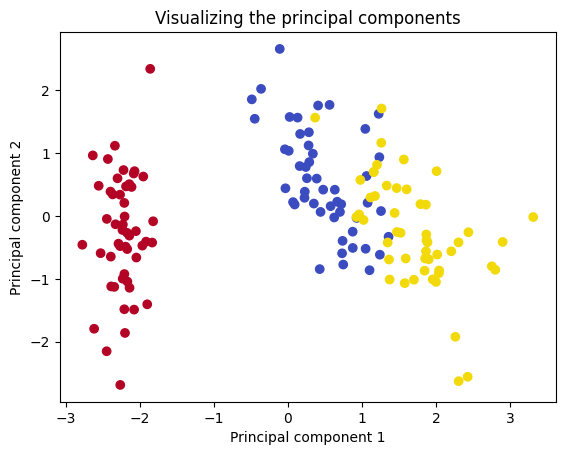

In [3]:
# Perform SVD on X
u, s, vh = np.linalg.svd(X, full_matrices=False)

# Use vh.T to get a (2, 2) projection matrix
proj_matrix = vh.T

# Project onto the principal components
X_proj = X.dot(proj_matrix)

# Plot projection
colors = [colors[i] for i in y]  # Map target values to colors
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colors)
plt.title('Visualizing the principal components')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

[0.72962445 0.22850762]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


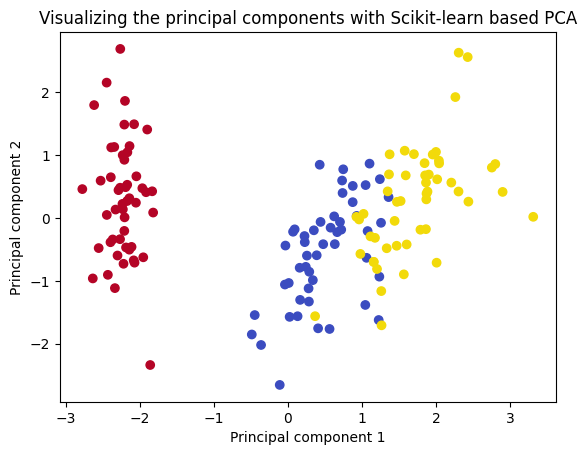

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.components_)
X = pca.transform(X)

# Color definitions
colors = {
  0: '#b40426',
  1: '#3b4cc0',
  2: '#f2da0a',
}

# Make plot of projection
colors = list(map(lambda x: colors[x], y))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title(f'Visualizing the principal components with Scikit-learn based PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()